## Observations and Insights

## Dependencies and starter code

In [502]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



In [503]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [504]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [505]:
# Combine the data into a single dataset
mergeddata = pd.merge(mouse_metadata,study_results,how="outer",on="Mouse ID")

In [506]:
mergeddata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

# Summary statistics

In [507]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
GRregimen = mergeddata.groupby(['Drug Regimen'])

In [508]:
mean=GRregimen['Tumor Volume (mm3)'].mean()

In [509]:
median=GRregimen['Tumor Volume (mm3)'].median()

In [510]:
variance=GRregimen['Tumor Volume (mm3)'].var()

In [511]:
SD=GRregimen['Tumor Volume (mm3)'].std()

In [540]:
SummaryStatistics=pd.DataFrame({"Mean":mean,"Median":median,"Variance":variance,"Deviation":SD},)
SummaryStatistics

,Mean,Median,Variance,Deviation
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.322552,50.854632,42.351070,6.507770
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


## Bar plots

In [541]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
countT=mergeddata['Drug Regimen'].value_counts()

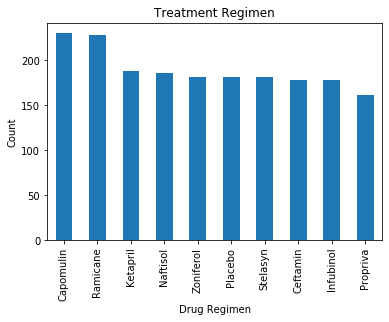

In [542]:
countT.plot(kind="bar")
plt.title("Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.show()

In [543]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
mergeddata['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [544]:
DrugRunique=['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

In [545]:
counttt=pd.DataFrame({"Count":countT})

In [546]:
countunique=[230, 228, 188, 186, 182, 181, 178, 161]

In [547]:
drugn=['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
count3=[230, 228, 188, 186, 182, 181, 178, 161]
xaxis = np.arange(len(count3))

Text(0, 0.5, 'Count')

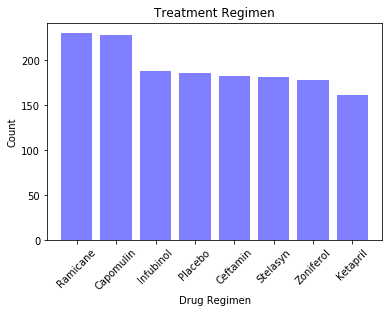

In [548]:

plt.bar(xaxis,count3,color='b',alpha=0.5,align='center')
tick_locations = [value for value in xaxis]
plt.xticks(tick_locations, drugn)
plt.xlim(-0.75, len(xaxis)-0.25)
plt.xticks(rotation=45)
plt.title("Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

## Pie plots

In [549]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
countMvsF=mergeddata['Sex'].value_counts()

In [550]:
MvsF=pd.DataFrame({"sex":countMvsF})

Text(0.5, 1.0, 'Male vs Female Mice')

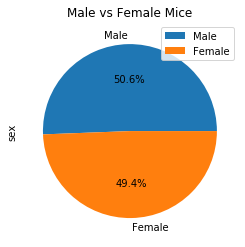

In [551]:
MvsF.plot(kind='pie',y='sex',autopct='%1.1f%%')
plt.title("Male vs Female Mice")

In [552]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex=['Male','Female']

In [553]:
countsex=MvsF['sex'].unique()

Text(0.5, 1.0, 'Male vs Female Mice')

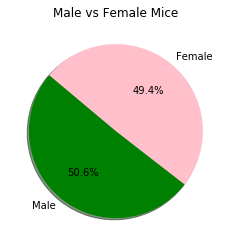

In [554]:
sex=['Male','Female']
countsex= [958, 935]
colors=["green","pink"]
xaxis = np.arange(len(countsex))
plt.pie(countsex, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140) 
plt.title("Male vs Female Mice")

#Quartiles, outliers and boxplots

In [555]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [556]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [571]:
# Generate a lne plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = mergeddata.loc[mergeddata["Drug Regimen"] == "Capomulin"]

In [572]:
Ramicane = mergeddata.loc[mergeddata["Drug Regimen"] == "Ramicane"]
Ramicane

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


In [577]:
k403 = Ramicane.loc[Ramicane["Mouse ID"] == "k403"]

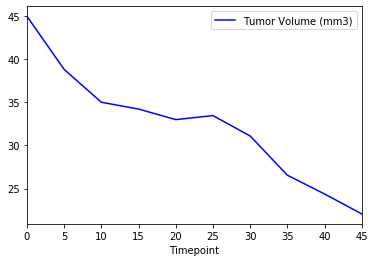

In [578]:
k403 = k403.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
k403 = k403.reset_index(drop=True)
k403.set_index('Timepoint').plot( color='blue')

In [569]:
s185 = capomulin.loc[capomulin["Mouse ID"] == "s185"]

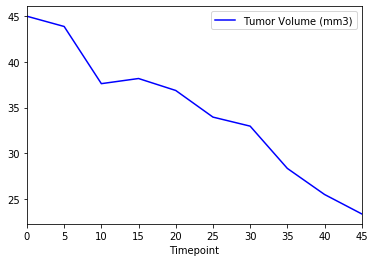

In [570]:
s185 = s185.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
s185 = s185.reset_index(drop=True)
s185.set_index('Timepoint').plot( color='blue')

In [534]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [535]:
average1 = capomulin.groupby(['Mouse ID']).agg(Weight=('Weight (g)', np.mean),AverageVolume=('Tumor Volume (mm3)', np.mean))


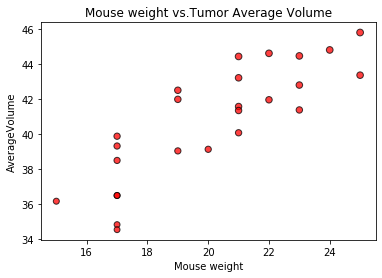

In [536]:
plt.scatter(
    average1['Weight'],
    average1['AverageVolume'],
    marker='o',
    facecolors='red',
    edgecolors='black',
    s=average1['AverageVolume'],
    alpha=.75)

plt.title("Mouse weight vs.Tumor Average Volume")
plt.xlabel("Mouse weight")
plt.ylabel("AverageVolume")

plt.show()

The r-squared is: 0.8419363424694718
The regression line is: y = 0.95x + 21.55


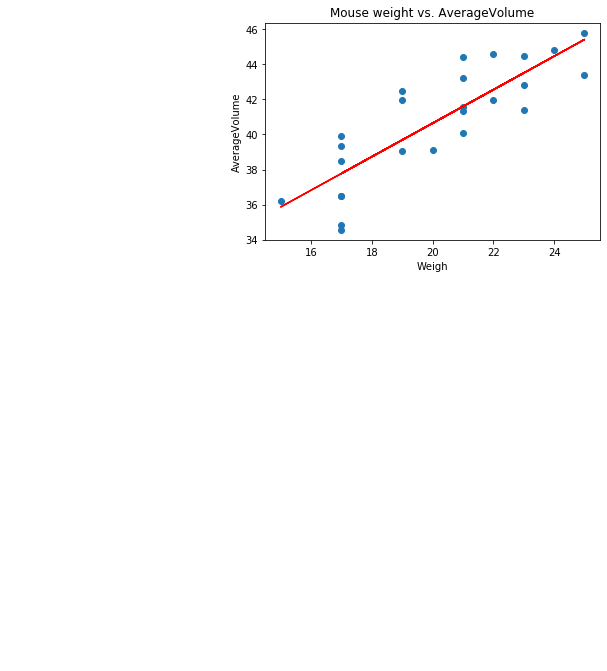

In [537]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Print out the r-squared value along with the plot.
x_values = average1['Weight']
y_values = average1['AverageVolume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")
plt.title("Mouse weight vs. AverageVolume")
plt.xlabel("Weigh")
plt.ylabel("AverageVolume")
print(f"The r-squared is: {rvalue}")
print(f"The regression line is: {line_eq}")
plt.show()